Write a Python program to download and preprocess a text corpus of your choice, such
as from NLTK or Hugging Face. Implement functions to compute Term-Based Metrics
(TBM), including Term Frequency (TF), Document Frequency (DF), and Inverse Document
Frequency (IDF). Calculate the raw and normalized term frequency of words in the corpus
and compare different weighting schemes. Next, compute the TF-IDF score for each term
and analyze its significance in identifying important words. Finally, visualize the top-ranked
terms using a bar chart or word cloud and discuss how preprocessing impacts the results.

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


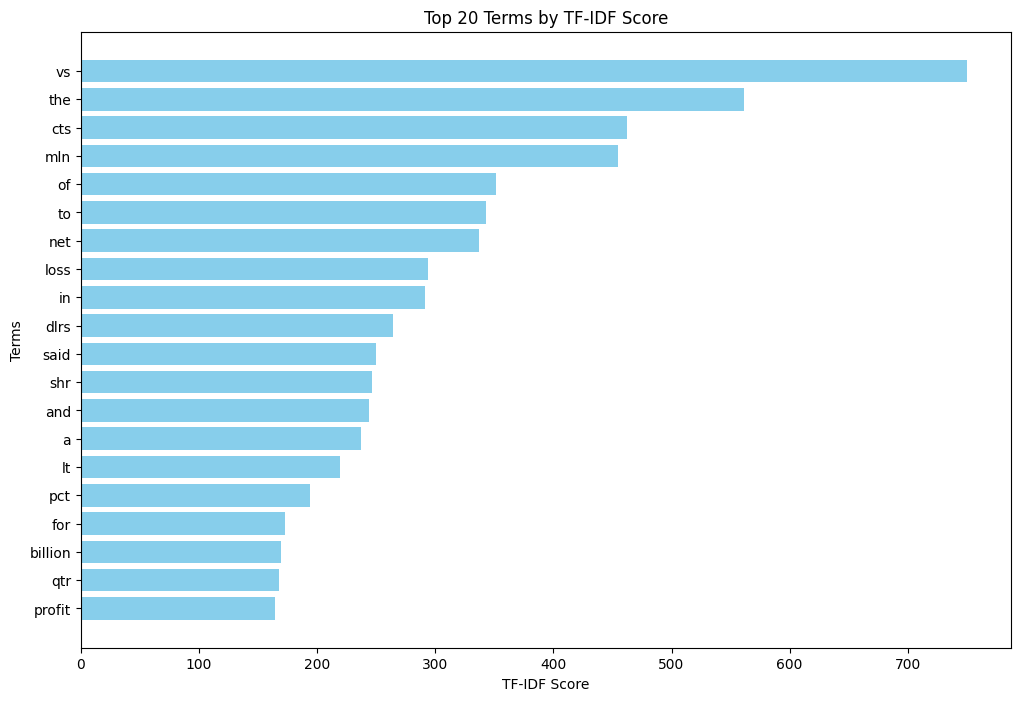

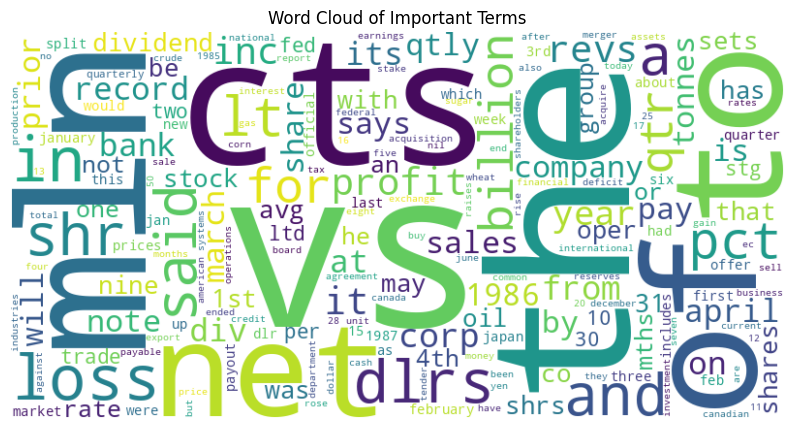

Analysis complete. Check the visualizations for insights.


In [2]:

import nltk
from nltk.corpus import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from collections import Counter


nltk.download('reuters')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')


def preprocess_corpus():
    documents = [reuters.raw(file_id) for file_id in reuters.fileids()]
    return documents


def compute_tf(documents):
    tf_list = []
    for doc in documents:
        tokens = nltk.word_tokenize(doc.lower())
        filtered_tokens = [word for word in tokens if word.isalnum()]
        tf = Counter(filtered_tokens)
        total_terms = sum(tf.values())
        tf = {word: count / total_terms for word, count in tf.items()}
        tf_list.append(tf)
    return tf_list


def compute_df(tf_list):
    df = Counter()
    for tf in tf_list:
        for term in tf.keys():
            df[term] += 1
    return df


def compute_idf(df, total_docs):
    idf = {term: np.log((total_docs + 1) / (count + 1)) + 1 for term, count in df.items()}
    return idf


def compute_tfidf(tf_list, idf):
    tfidf_scores = []
    for tf in tf_list:
        tfidf = {term: tf[term] * idf[term] for term in tf.keys()}
        tfidf_scores.append(tfidf)
    return tfidf_scores


def visualize_top_terms(tfidf_scores, top_n=20):
    aggregated_tfidf = Counter()
    for tfidf in tfidf_scores:
        aggregated_tfidf.update(tfidf)

    most_common_terms = aggregated_tfidf.most_common(top_n)

    terms, scores = zip(*most_common_terms)

    plt.figure(figsize=(12, 8))
    plt.barh(terms, scores, color='skyblue')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Terms')
    plt.title(f'Top {top_n} Terms by TF-IDF Score')
    plt.gca().invert_yaxis()
    plt.show()


def visualize_wordcloud(tfidf_scores):
    aggregated_tfidf = Counter()
    for tfidf in tfidf_scores:
        aggregated_tfidf.update(tfidf)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(aggregated_tfidf)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Important Terms')
    plt.show()


def main():
    documents = preprocess_corpus()


    tf_list = compute_tf(documents)
    df = compute_df(tf_list)
    idf = compute_idf(df, len(documents))
    tfidf_scores = compute_tfidf(tf_list, idf)


    visualize_top_terms(tfidf_scores)
    visualize_wordcloud(tfidf_scores)

    print("Analysis complete. Check the visualizations for insights.")

if __name__ == '__main__':
    main()
